# Calculation of initial profiles

Calculation of initial profiles of $\ln(n)$ and $u_{\parallel}$ are here calculated.

In [1]:
from IPython.display import display

from sympy import symbols
from sympy import integrate
from sympy import ln, exp
from sympy import init_printing
from sympy import Function, Eq

init_printing()

In [2]:
z, Lz = symbols('z, L_z', positive = True)

S = Function('S', positive = True)
n = Function('n', positive = True)
u = Function('u', real = True)

From the continuity equation we have

$\partial_t n + \nabla \cdot (nu) = S$

Assuming only the parallel part contributes, we get

$\partial_t n + \partial_z (nu) = S$

In steady state, we have then that

\begin{align*}
\partial_z (nu) &= S\\
\int_{z}^{L_z}\partial_z (nu) dz&= \int_{z}^{L_z} S dz\\
(nu)\big|_z - (nu)\big|_{L_z} &= \int_{z}^{L_z} S dz\\
u(z) &= \frac{\int_{z}^{L_z} S dz + (nu)\big|_{L_z}}{n(z)}
\end{align*}

This gives (using $u(L_z)=c_s=1$ in normalized units)

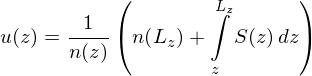

In [3]:
rhs = (integrate(S(z), (z, z, Lz)) + n(z).subs(z, Lz)*1)/n(z)
display(Eq(u(z), rhs))

## Specification of the functions

In [4]:
# Starts at 1, ends at -0.5
nF = 1 - 1.5*z/Lz

# Made as a gaussian function
a    = 0.05 
bRho = 0 
bZ   = 25
cRho = 10
cZ   = 7 
# The source
# SF = a*exp(-(z-bZ)**2.0/(2.0*(cZ**2.0)))
SF = 0

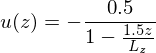

In [5]:
rhs = rhs.subs([(n(z), nF),\
                (n(Lz), nF.subs(z, Lz)),\
                (S(z), SF),\
               ]).doit()

display(Eq(u(z),rhs))

In [6]:
print('n = {}'.format(nF))
print('u = {}'.format(rhs))

n = 1 - 1.5*z/L_z
u = -0.5/(1 - 1.5*z/L_z)


Hmmm...this is not quite satisfying as profile does not look like what is found in the simulations. As a bonus, get singularities.